In [ ]:
import base64
import io
import torch
from diffusers import DiffusionPipeline, AutoencoderKL, EulerAncestralDiscreteScheduler
from PIL import Image

/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
vae = AutoencoderKL.from_pretrained(
                "madebyollin/sdxl-vae-fp16-fix", torch_dtype=torch.float16)
euler_anc = EulerAncestralDiscreteScheduler.from_pretrained("stabilityai/stable-diffusion-xl-base-1.0", subfolder="scheduler")
pipe = DiffusionPipeline.from_pretrained(
                "stabilityai/stable-diffusion-xl-base-1.0",
                scheduler=euler_anc,
                vae=vae,
                torch_dtype=torch.float16,
            ).to("cuda")

Loading pipeline components...: 100%|██████████| 7/7 [00:02<00:00,  2.43it/s]


In [ ]:
image = pipe("a single apple logo on white background, LogoRedmAF", cross_attention_kwargs={"scale": 0}, num_inference_steps=20).images[0]

  0%|          | 0/20 [00:00<?, ?it/s]

100%|██████████| 20/20 [00:03<00:00,  6.46it/s]


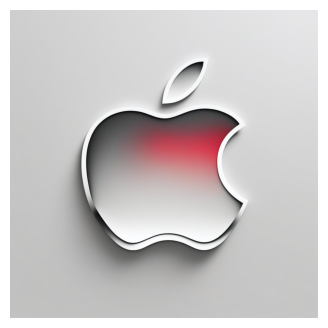

In [81]:
import matplotlib.pyplot as plt
plt.figure(figsize = (4,4)) # Установите размер изображения
plt.imshow(image)
plt.axis('off') # Уберите рамки
plt.show()

In [ ]:
pipe.unet.load_attn_procs("artificialguybr/ColoringBookRedmond",
            weight_name="ColoringBookRedmond-ColoringBookAF.safetensors")

In [ ]:
pipe

In [4]:
pipe.unet = torch.compile(pipe.unet, mode="reduce-overhead", fullgraph=False)